In [71]:
import pandas as pd
import numpy as np
import pickle as pk
import matplotlib.pyplot as plt

import h2o
from h2o.automl import H2OAutoML
from h2o.tree import H2OTree

In [3]:
df = pd.read_pickle("../../data/df.pkl")

### IA Filter

In [4]:
df = df.loc[df.type_bool == True]
df

,desg,desi,desr,desz,Xaxis,desg_GP,desi_GP,desr_GP,desz_GP,wavelets,...,f14,f15,f16,f17,f18,f19,f20,type,type_bool,REDSHIFT_SPEC
ID,,,,,,,,,,,,,,,,,,,,,
SN10005,"[[10.027000000001863, 4.996, 8.081], [33.94500...","[[0.015000000006693881, 0.2977, 2.206], [18.94...","[[0.0, 1.033, 1.325], [13.015000000006694, 0.4...","[[0.03500000000349246, 1.826, 3.029], [48.875,...","[0.0, 1.0381919191919462, 2.0763838383838924, ...","([10.027000000001863, 10.782565656567513, 11.5...","([0.015000000006693881, 1.0530404040470573, 2....","([0.0, 1.0281717171717606, 2.056343434343521, ...","([0.03500000000349246, 1.0222929292964054, 2.0...","[2.000004411755352, 2.000003547336676, 2.00000...",...,-26.554909,15.768490,16.436792,17.114795,-20.292951,-24.222566,-11.295562,Ia,True,1.08327
SN10007,"[[0.0, 6.266, 10.48], [10.105999999999767, 17....","[[0.03200000000651926, 7.161, 9.313], [2.01600...","[[2.0, 1.24, 2.429], [10.121000000006461, 20.0...","[[0.9770000000062282, 0.6586, 5.329], [15.9930...","[0.0, 1.5136565656566285, 3.027313131313257, 4...","([0.0, 1.5132626262626456, 3.0265252525252913,...","([0.03200000000651926, 1.5451717171782005, 3.0...","([2.0, 3.49314141414145, 4.9862828282829, 6.47...","([0.9770000000062282, 2.480787878794107, 3.984...","[11.341091517194192, 8.812204685737349, 6.9798...",...,-99.877031,21.670852,24.155364,-26.622112,-27.616185,-19.981432,49.299250,Ia,True,0.82331
SN100361,"[[6.957000000002154, 16.02, 23.92], [7.9690000...","[[0.023000000001047738, 4.903, 3.324], [6.9840...","[[0.0, 0.7103, 2.626], [5.9760000000023865, 5....","[[8.055000000000291, 2.567, 2.665], [15.035000...","[0.0, 1.3031111111111275, 2.606222222222255, 3...","([6.957000000002154, 8.15910101010318, 9.36120...","([0.023000000001047738, 1.315494949496019, 2.6...","([0.0, 1.3026767676768058, 2.6053535353536117,...","([8.055000000000291, 9.27674747474778, 10.4984...","[8.233549869515556, 9.464488874691614, 10.4511...",...,102.074783,-95.727930,4.861555,-29.749073,23.442440,5.441237,12.503390,Ia,True,0.90012
SN100471,"[[0.0, 3.79, 4.764], [11.969000000004598, 1.67...","[[0.023999999997613486, 2.202, 3.146], [3.0429...","[[0.008000000001629815, 0.4567, 2.129], [3.004...","[[0.046999999998661224, 6.92, 2.486], [3.07500...","[0.0, 1.4638181818181601, 2.9276363636363203, ...","([0.0, 1.3621414141414037, 2.7242828282828073,...","([0.023999999997613486, 1.4875757575733735, 2....","([0.008000000001629815, 1.3701818181834458, 2....","([0.046999999998661224, 1.3283737373723963, 2....","[5.63245418874034, 5.603687474301877, 5.594769...",...,-40.831628,28.629443,12.801879,-0.555542,13.065768,-21.776767,9.358561,Ia,True,0.92640
SN100490,"[[0.0, 0.01278, 2.833], [8.11699999999837, 1.7...","[[0.026999999994586688, 1.849, 5.434], [8.1449...","[[15.0, 0.4107, 4.054], [46.042999999997846, 6...","[[1.1679999999978463, 1.572, 6.291], [49.96899...","[0.0, 0.7267979797979933, 1.4535959595959866, ...","([0.0, 0.5955656565656131, 1.1911313131312262,...","([0.026999999994586688, 0.7435858585804729, 1....","([15.0, 15.565262626262582, 16.130525252525164...","([1.1679999999978463, 1.8829999999978817, 2.59...","[8.351889035545303, 8.47302530763294, 8.594179...",...,-36.484191,38.259352,-88.907842,76.656123,50.003481,-5.379145,-57.678266,Ia,True,0.73814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN98918,"[[0.0, 3.693, 2.686], [4.984000000004016, 18.7...","[[5.94100000000617, 6.403, 9.191], [13.1840000...","[[4.996000000006461, 8.241, 6.049], [12.141000...","[[0.027000000001862645, 3.092, 4.045], [5.0120...","[0.0, 1.3522323232323885, 2.704464646464777, 4...","([0.0, 1.3017676767676767, 2.6035353535353534,...","([5.94100000000617, 7.233222222228395, 8.52544...","([4.996000000006461, 6.297686868693313, 7.5993...","([0.027000000001862645, 1.2480808080826955, 2....","[16.23491946702271, 16.82763060047037, 17.3637...",...,-34.255294,-4.973908,11.915895,-56.738013,-27.269352,9.479893,7.803001,Ia,True,0.76083
SN99404,"[[0.0, 6.586, 10.48], [15

In [47]:
X = df.loc[:,'f1':'REDSHIFT_SPEC']
X_train = X.iloc[0:int(len(X)/2)]
X_test = X.iloc[int(len(X)/2):-1].loc[:,'f1':'f20']
X_validate = X.iloc[int(len(X)/2):-1]

y = df.loc[:,'REDSHIFT_SPEC']
y_train = y.iloc[0:int(len(X)/2)]
y_test = y.iloc[int(len(X)/2):-1]

### Auto ML

In [6]:
h2o.init(ip="localhost", port=54323)

Checking whether there is an H2O instance running at http://localhost:54323 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /home/fmoliveira/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp75hhtiko
  JVM stdout: /tmp/tmp75hhtiko/h2o_fmoliveira_started_from_python.out
  JVM stderr: /tmp/tmp75hhtiko/h2o_fmoliveira_started_from_python.err
  Server is running at http://127.0.0.1:54323
Connecting to H2O server at http://127.0.0.1:54323 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Sao_Paulo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,H2O_from_python_fmoliveira_u9kxo5
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.881 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


### Initialize Auto ML

In [19]:
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=list(df.loc[:,'f1':'f20'].columns), y='REDSHIFT_SPEC', training_frame=h2o.H2OFrame())

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


In [70]:
lb = aml.leaderboard.as_data_frame(use_pandas=True)
lb.model_id.values

array(['StackedEnsemble_AllModels_AutoML_20201116_234447',
       'StackedEnsemble_BestOfFamily_AutoML_20201116_234447',
       'GBM_2_AutoML_20201116_234447', 'GBM_3_AutoML_20201116_234447',
       'GBM_1_AutoML_20201116_234447', 'GBM_4_AutoML_20201116_234447',
       'GBM_grid__1_AutoML_20201116_234447_model_2',
       'GBM_grid__1_AutoML_20201116_234447_model_1',
       'DRF_1_AutoML_20201116_234447', 'XRT_1_AutoML_20201116_234447',
       'XGBoost_grid__1_AutoML_20201116_234447_model_3',
       'XGBoost_3_AutoML_20201116_234447', 'GBM_5_AutoML_20201116_234447',
       'XGBoost_grid__1_AutoML_20201116_234447_model_4',
       'XGBoost_2_AutoML_20201116_234447',
       'XGBoost_1_AutoML_20201116_234447',
       'XGBoost_grid__1_AutoML_20201116_234447_model_1',
       'XGBoost_grid__1_AutoML_20201116_234447_model_2',
       'DeepLearning_grid__2_AutoML_20201116_234447_model_1',
       'DeepLearning_grid__1_AutoML_20201116_234447_model_1',
       'DeepLearning_1_AutoML_20201116_234447',

In [63]:
df_predictions = pd.DataFrame(X_validate['REDSHIFT_SPEC'])
df_predictions.reset_index(inplace = True)
for model in lb.model_id.values:
    models.append(h2o.get_model(model))
    preds = h2o.get_model(model).predict(h2o.H2OFrame(X_test.loc[:,'f1':'f20']))
    df_ = preds.as_data_frame()
    df_.columns = [model]
    df_predictions = pd.concat([df_predictions, df_], axis = 1)
df_predictions.set_index('ID',inplace = True)

Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
Parse progress: |███████████

In [68]:
df_predictions

,REDSHIFT_SPEC,StackedEnsemble_AllModels_AutoML_20201116_232854,StackedEnsemble_BestOfFamily_AutoML_20201116_232854,GBM_2_AutoML_20201116_232854,GBM_3_AutoML_20201116_232854,GBM_4_AutoML_20201116_232854,GBM_1_AutoML_20201116_232854,GBM_grid__1_AutoML_20201116_232854_model_2,GBM_5_AutoML_20201116_232854,GBM_grid__1_AutoML_20201116_232854_model_1,...,XGBoost_grid__1_AutoML_20201116_232854_model_3,XGBoost_3_AutoML_20201116_232854,XGBoost_grid__1_AutoML_20201116_232854_model_1,XGBoost_1_AutoML_20201116_232854,XGBoost_2_AutoML_20201116_232854,XGBoost_grid__1_AutoML_20201116_232854_model_2,DeepLearning_grid__2_AutoML_20201116_232854_model_1,DeepLearning_1_AutoML_20201116_232854,DeepLearning_grid__1_AutoML_20201116_232854_model_1,GLM_1_AutoML_20201116_232854
ID,,,,,,,,,,,,,,,,,,,,,
SN509093,0.54501,0.579679,0.588375,0.592400,0.569145,0.566104,0.587819,0.614219,0.624126,0.618287,...,0.600931,0.609725,0.611180,0.555203,0.548287,0.544950,0.581606,0.557299,0.548352,0.741974
SN509279,0.65538,0.625060,0.624283,0.626885,0.620215,0.635472,0.603989,0.611711,0.607513,0.578516,...,0.623803,0.590442,0.589653,0.654650,0.658422,0.654999,0.600213,0.646310,0.555853,0.745700
SN509387,0.45100,0.495560,0.497294,0.506876,0.498468,0.476523,0.491347,0.493052,0.524366,0.518057,...,0.516117,0.483926,0.489526,0.451110,0.475140,0.451137,0.552932,0.533963,0.498383,0.707477
SN50950,0.51480,0.545672,0.552910,0.555059,0.538662,0.544284,0.591413,0.546904,0.561731,0.560837,...,0.555100,0.526281,0.533645,0.523082,0.507658,0.513794,0.617424,0.638320,0.636925,0.768102
SN509630,0.68329,0.757120,0.757349,0.766358,0.750587,0.761747,0.787931,0.753697,0.745314,0.793326,...,0.761648,0.795557,0.740617,0.698825,0.692597,0.685053,0.680346,0.766204,0.799727,0.770863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN98880,0.30050,0.305586,0.313605,0.320708,0.293044,0.301701,0.312374,0.325831,0.345473,0.331604,...,0.322726,0.309404,0.326692,0.326071,0.298520,0.302168,0.354150,0.415250,0.306871,0.646468
SN98918,0.76083,0.826604,0.832567,0.836111,0.817147,0.821296,0.822690,0.797732,0.819576,0.863549,...,0.775012,0.835218,0.848477,0.754096,0.763490,0.761483,0.801375,0.926933,0.869119,0.779151
SN99404,0.89529,0.829360,0.841886,0.821811,0.827846,0.772216,0.887549,0.628989,0.512806,0.657182,...,0.739570,0.809033,0.884543,0.862477,0.536333,0.892763,1.361348,0.867562,1.047783,1.006037


In [86]:
ex = df_predictions.loc[:,df_predictions.columns[1]:df_predictions.columns[-1]]
ex.values

array([0.57967939, 0.5883746 , 0.59240028, 0.56914541, 0.56610383,
       0.58781922, 0.61421902, 0.62412554, 0.61828723, 0.57603137,
       0.56563646, 0.61655247, 0.60093129, 0.60972494, 0.61118013,
       0.55520284, 0.54828727, 0.54495013, 0.58160646, 0.55729898,
       0.54835152, 0.74197393])

In [87]:
x = np.linspace(ex.values.min(), ex.values.max(), 100)

In [88]:
x

array([0.54495013, 0.54694027, 0.54893041, 0.55092055, 0.55291069,
       0.55490082, 0.55689096, 0.5588811 , 0.56087124, 0.56286138,
       0.56485152, 0.56684166, 0.5688318 , 0.57082194, 0.57281208,
       0.57480222, 0.57679236, 0.5787825 , 0.58077264, 0.58276278,
       0.58475292, 0.58674305, 0.58873319, 0.59072333, 0.59271347,
       0.59470361, 0.59669375, 0.59868389, 0.60067403, 0.60266417,
       0.60465431, 0.60664445, 0.60863459, 0.61062473, 0.61261487,
       0.61460501, 0.61659515, 0.61858528, 0.62057542, 0.62256556,
       0.6245557 , 0.62654584, 0.62853598, 0.63052612, 0.63251626,
       0.6345064 , 0.63649654, 0.63848668, 0.64047682, 0.64246696,
       0.6444571 , 0.64644724, 0.64843738, 0.65042751, 0.65241765,
       0.65440779, 0.65639793, 0.65838807, 0.66037821, 0.66236835,
       0.66435849, 0.66634863, 0.66833877, 0.67032891, 0.67231905,
       0.67430919, 0.67629933, 0.67828947, 0.68027961, 0.68226974,
       0.68425988, 0.68625002, 0.68824016, 0.6902303 , 0.69222

In [ ]:
ax.axvline(y_pred[i], c='k', ls='--', lw='3')
ax.axvline(y_test[i], c='r', ls='--', lw='3')

ax.hist(y, density=True, histtype='step')

In [89]:
pdf = gaussian_kde(ex.values).pdf(x)


In [90]:
ax.plot(x, pdf)

In [92]:
pdf

array([ 6.50187189,  6.88886039,  7.26490498,  7.62702201,  7.97247935,
        8.29884587,  8.6040301 ,  8.886307  ,  9.14433233,  9.37714457,
        9.58415492,  9.76512598,  9.92014052, 10.04956158, 10.15398562,
       10.23419055, 10.29108059, 10.32563003, 10.33882796, 10.33162619,
       10.30489241, 10.25937064, 10.19565082, 10.11414923, 10.01510083,
        9.89856441,  9.76444077,  9.61250343,  9.44244084,  9.25390825,
        9.04658672,  8.82024643,  8.57481058,  8.31041655,  8.02747034,
        7.7266911 ,  7.40914265,  7.07624965,  6.72979708,  6.37191239,
        6.00503092,  5.63184591,  5.25524562,  4.87824056,  4.50388437,
        4.13519244,  3.77506203,  3.42619771,  3.09104537,  2.77173759,
        2.47005224,  2.18738543,  1.92473925,  1.68272381,  1.46157234,
        1.26116778,  1.08107874,  0.9206024 ,  0.77881198,  0.65460643,
        0.54676004,  0.45397019,  0.37490154,  0.30822558,  0.25265458,
        0.2069696 ,  0.17004232,  0.1408508 ,  0.11848959,  0.10

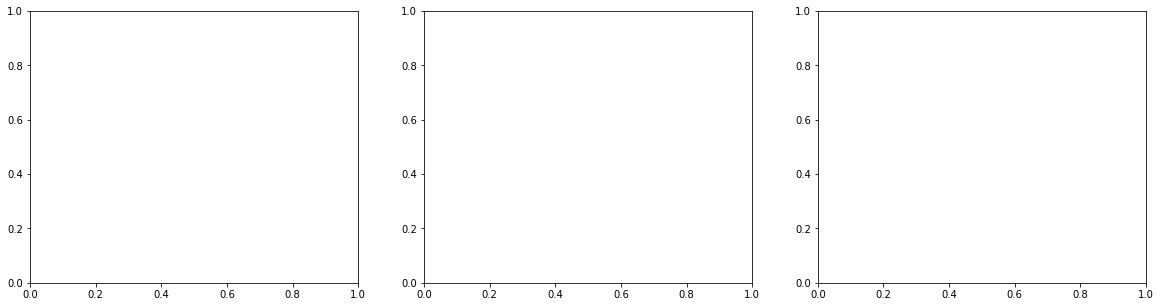

In [91]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
ax.plot(x, pdf)

In [79]:
df_predictions.loc[:,df_predictions.columns[1]:df_predictions.columns[-1]]

,StackedEnsemble_AllModels_AutoML_20201116_232854,StackedEnsemble_BestOfFamily_AutoML_20201116_232854,GBM_2_AutoML_20201116_232854,GBM_3_AutoML_20201116_232854,GBM_4_AutoML_20201116_232854,GBM_1_AutoML_20201116_232854,GBM_grid__1_AutoML_20201116_232854_model_2,GBM_5_AutoML_20201116_232854,GBM_grid__1_AutoML_20201116_232854_model_1,XRT_1_AutoML_20201116_232854,...,XGBoost_grid__1_AutoML_20201116_232854_model_3,XGBoost_3_AutoML_20201116_232854,XGBoost_grid__1_AutoML_20201116_232854_model_1,XGBoost_1_AutoML_20201116_232854,XGBoost_2_AutoML_20201116_232854,XGBoost_grid__1_AutoML_20201116_232854_model_2,DeepLearning_grid__2_AutoML_20201116_232854_model_1,DeepLearning_1_AutoML_20201116_232854,DeepLearning_grid__1_AutoML_20201116_232854_model_1,GLM_1_AutoML_20201116_232854
ID,,,,,,,,,,,,,,,,,,,,,
SN509093,0.579679,0.588375,0.592400,0.569145,0.566104,0.587819,0.614219,0.624126,0.618287,0.576031,...,0.600931,0.609725,0.611180,0.555203,0.548287,0.544950,0.581606,0.557299,0.548352,0.741974
SN509279,0.625060,0.624283,0.626885,0.620215,0.635472,0.603989,0.611711,0.607513,0.578516,0.636269,...,0.623803,0.590442,0.589653,0.654650,0.658422,0.654999,0.600213,0.646310,0.555853,0.745700
SN509387,0.495560,0.497294,0.506876,0.498468,0.476523,0.491347,0.493052,0.524366,0.518057,0.463954,...,0.516117,0.483926,0.489526,0.451110,0.475140,0.451137,0.552932,0.533963,0.498383,0.707477
SN50950,0.545672,0.552910,0.555059,0.538662,0.544284,0.591413,0.546904,0.561731,0.560837,0.551047,...,0.555100,0.526281,0.533645,0.523082,0.507658,0.513794,0.617424,0.638320,0.636925,0.768102
SN509630,0.757120,0.757349,0.766358,0.750587,0.761747,0.787931,0.753697,0.745314,0.793326,0.733428,...,0.761648,0.795557,0.740617,0.698825,0.692597,0.685053,0.680346,0.766204,0.799727,0.770863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SN98880,0.305586,0.313605,0.320708,0.293044,0.301701,0.312374,0.325831,0.345473,0.331604,0.326202,...,0.322726,0.309404,0.326692,0.326071,0.298520,0.302168,0.354150,0.415250,0.306871,0.646468
SN98918,0.826604,0.832567,0.836111,0.817147,0.821296,0.822690,0.797732,0.819576,0.863549,0.811301,...,0.775012,0.835218,0.848477,0.754096,0.763490,0.761483,0.801375,0.926933,0.869119,0.779151
SN99404,0.829360,0.841886,0.821811,0.827846,0.772216,0.887549,0.628989,0.512806,0.657182,0.782390,...,0.739570,0.809033,0.884543,0.862477,0.536333,0.892763,1.361348,0.867562,1.047783,1.006037


In [74]:
for model in df_predictions.columns[1:].values:
    

array(['StackedEnsemble_AllModels_AutoML_20201116_232854',
       'StackedEnsemble_BestOfFamily_AutoML_20201116_232854',
       'GBM_2_AutoML_20201116_232854', 'GBM_3_AutoML_20201116_232854',
       'GBM_4_AutoML_20201116_232854', 'GBM_1_AutoML_20201116_232854',
       'GBM_grid__1_AutoML_20201116_232854_model_2',
       'GBM_5_AutoML_20201116_232854',
       'GBM_grid__1_AutoML_20201116_232854_model_1',
       'XRT_1_AutoML_20201116_232854', 'DRF_1_AutoML_20201116_232854',
       'XGBoost_grid__1_AutoML_20201116_232854_model_4',
       'XGBoost_grid__1_AutoML_20201116_232854_model_3',
       'XGBoost_3_AutoML_20201116_232854',
       'XGBoost_grid__1_AutoML_20201116_232854_model_1',
       'XGBoost_1_AutoML_20201116_232854',
       'XGBoost_2_AutoML_20201116_232854',
       'XGBoost_grid__1_AutoML_20201116_232854_model_2',
       'DeepLearning_grid__2_AutoML_20201116_232854_model_1',
       'DeepLearning_1_AutoML_20201116_232854',
       'DeepLearning_grid__1_AutoML_20201116_232854_mo